Рассмотрим уравнение 

\begin{equation*}
i\frac{\partial a}{\partial {t}} = i\frac{\partial a}{\partial {x}} - \dfrac{g}{4} |a|^2 a - i \dfrac{g^2}{32 M_0^2}  {|a|^2 \dfrac{\partial |a|^2} {\partial x} a} - \eta \dfrac{\partial^2 a} {\partial x^2} + M_0^2 \eta a 
 \:.
\end{equation*} 

Построим численное решение, полученное в Матлаб с применением метода split-step для параметров $M = 1;~g = 1;~\eta = 0.001$.

In [14]:
# !pip install pysindy
import pysindy as ps

In [26]:
import numpy as np
import matplotlib.pyplot as plt

x = np.loadtxt('x.dat')
t = np.loadtxt('t.dat')

re_a = np.loadtxt('Solutionre_mNLSeq.dat')
im_a = np.loadtxt('Solutionim_mNLSeq.dat')

Text(0.5, 1.0, '$|a(x, t)|^2$')

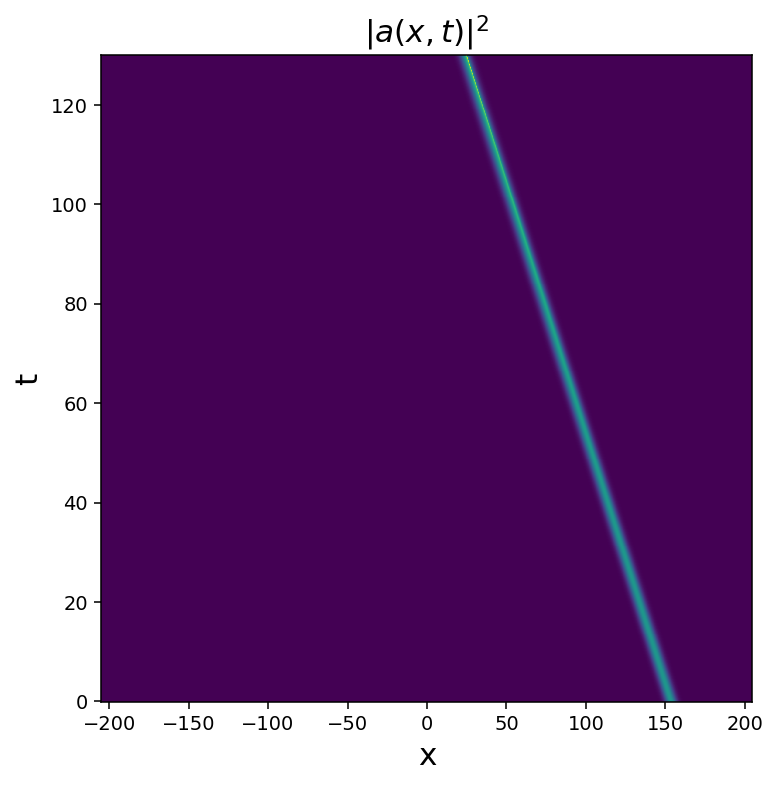

In [16]:
plt.figure(figsize=(6, 6), dpi=140)
plt.subplot(1, 1, 1)
a=re_a+1j*im_a
plt.pcolormesh(x, t, abs(a)**2)
plt.xlabel('x', fontsize=16)
plt.ylabel('t', fontsize=16)
plt.title(r'$|a(x, t)|^2$', fontsize=16)

In [17]:
a=re_a
a

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         5.90434579e-46,  3.92783606e-46,  2.61088346e-46],
       [ 6.50521303e-19, -8.45677695e-18, -1.71303943e-17, ...,
         2.76340614e-18,  2.09437509e-18, -3.10542145e-17],
       [ 4.61870125e-17, -1.21430643e-17, -5.55111512e-17, ...,
         5.12661431e-17, -2.77102720e-17, -2.48403357e-17],
       ...,
       [-8.57810281e-07,  8.59275499e-07, -8.60740275e-07, ...,
         8.53411982e-07, -8.54878524e-07,  8.56344626e-07],
       [ 8.66392486e-07, -8.67927084e-07,  8.69461223e-07, ...,
        -8.61785922e-07,  8.63321908e-07, -8.64857426e-07],
       [-8.74024432e-07,  8.75631186e-07, -8.77237463e-07, ...,
         8.69201286e-07, -8.70809482e-07,  8.72417200e-07]])

In [18]:
a = np.reshape(a, (len(x), len(t), 1))

Real part:
$$
\begin{aligned}
& \frac{\partial a_I}{\partial t}=\frac{\partial a_I}{\partial x}+\frac{g}{4} a_R^3+\frac{g}{4} a_I^2 a_R-\frac{g^2}{16 M_0^2}\left[a_I^3 a_R \frac{\partial a_R}{\partial x}+a_R^3 a_I \frac{\partial a_R}{\partial x}+\right. \\
& \left.+a_I^4 \frac{\partial a_I}{\partial x}+a_R^2 a_I^2 \frac{\partial a_I}{\partial x}\right]+\eta \frac{\partial^2 a_R}{\partial x^2}-M_0^2 \eta a_R
\end{aligned}
$$
Imaginary part:
$$
\begin{aligned}
& \quad \frac{\partial a_R}{\partial t}=\frac{\partial a_R}{\partial x}-\frac{g}{4}\left[a_I^3+a_R^2 a_I\right]-\frac{g^2}{16 M_0^2}\left[a_R^4 \frac{\partial a_R}{\partial x}+a_{ I}^2 a_R^2 \frac{\partial a_R}{\partial x}+\right. \\
& \left.+a_R^3 a_I \frac{\partial a_I}{\partial x}+a_I^3 a_R \frac{\partial a_I}{\partial x}\right]-\eta \frac{\partial^2 a_I}{\partial x^2}+M_0^2 \eta a_I
\end{aligned}
$$

In [32]:
# Define weak form PDE library 
library_functions = [lambda x: x, lambda x: x * x]
library_function_names = [lambda x: 'x', lambda x: 'x^2']

# Need to define the 2D spatiotemporal grid before calling the library
X, T = np.meshgrid(x, t)
XT = np.asarray([X, T]).T


In [33]:
# pde_lib = ps.WeakPDELibrary(library_functions=library_functions, 
#                             function_names=library_function_names, 
#                             derivative_order=2,
#                             spatiotemporal_grid=XT,
#                             is_uniform=True, K=1000,
#                             )
# # Fit a weak form model
# optimizer = ps.SR3(threshold=0.1, thresholder='l0', 
#                    tol=1e-8, normalize_columns=True, max_iter=1000)
# model = ps.SINDy(feature_library=pde_lib, optimizer=optimizer)
# model.fit(a, quiet=True)
# model.print()

Ссылка на  PDELibrary https://pysindy.readthedocs.io/en/latest/api/pysindy.feature_library.html#pysindy.feature_library.PDELibrary

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mn>0.5</mn>
  <mo data-mjx-texclass="ORD" fence="false" stretchy="false">&#x2016;</mo>
  <mi>y</mi>
  <mo>&#x2212;</mo>
  <mi>X</mi>
  <mi>w</mi>
  <msubsup>
    <mo data-mjx-texclass="ORD" fence="false" stretchy="false">&#x2016;</mo>
    <mn>2</mn>
    <mn>2</mn>
  </msubsup>
  <mo>+</mo>
  <mi>&#x3BB;</mi>
  <mi>R</mi>
  <mo stretchy="false">(</mo>
  <mi>u</mi>
  <mo stretchy="false">)</mo>
  <mo>+</mo>
  <mo stretchy="false">(</mo>
  <mn>0.5</mn>
  <mrow data-mjx-texclass="ORD">
    <mo>/</mo>
  </mrow>
  <mi>&#x3BD;</mi>
  <mo stretchy="false">)</mo>
  <mo data-mjx-texclass="ORD" fence="false" stretchy="false">&#x2016;</mo>
  <mi>w</mi>
  <mo>&#x2212;</mo>
  <mi>u</mi>
  <msubsup>
    <mo data-mjx-texclass="ORD" fence="false" stretchy="false">&#x2016;</mo>
    <mn>2</mn>
    <mn>2</mn>
  </msubsup>
</math>

In [34]:
# Show that a non-weak form model screws this up badly
pde_lib = ps.PDELibrary(library_functions=library_functions, 
                        function_names=library_function_names, 
                        derivative_order=2, spatial_grid=x,
                        include_bias=False,
                        is_uniform=True)

# Fit and predict with the non-weak model
opt = ps.SR3(threshold=0.1, thresholder='l0', 
             tol=1e-10, normalize_columns=True, 
             max_iter=1000)

# opt = ps.optimizers.STLSQ(threshold=.1, alpha=.5)

model_for_prediction = ps.SINDy(feature_library=pde_lib, optimizer=opt)
model_for_prediction.fit(a)

# Prints a very wrong model
model_for_prediction.print()

/home/codespace/.python/current/lib/python3.10/site-packages/pysindy/optimizers/sr3.py:390: ConvergenceWarning: SR3._reduce did not converge after 1000 iterations.
  warnings.warn(


(x0)' = -47.569 x^2 + -47.569 abs(x^2) + -0.476 xx0_11


In [35]:
model_for_prediction.get_feature_names()

['x',
 'x^2',
 'abs(x^2)',
 'x0_1',
 'x0_11',
 'xx0_1',
 'x^2x0_1',
 'abs(x^2)x0_1',
 'xx0_11',
 'x^2x0_11',
 'abs(x^2)x0_11']

In [36]:
model_for_prediction.coefficients()

array([[  0.        , -47.56892449, -47.56892449,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
         -0.47568797,   0.        ,   0.        ]])

In [24]:
# import numpy as np
# from scipy.integrate import odeint
# # from pysindy import SINDy
# # from pysindy.optimizers import SSR
# lorenz = lambda z,t : [10 * (z[1] - z[0]),         z[0] * (28 - z[2]) - z[1],   z[0] * z[1] - 8 / 3 * z[2]]
# t = np.arange(0, 2, .002)
# x = odeint(lorenz, [-8, 8, 27], t)